In [284]:
# importing packages
import pandas as pd
import numpy as np

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [285]:
# reading data
champs_df = pd.read_csv('https://raw.githubusercontent.com/peanutshawny/league-of-legends/master/data/champions.csv')
champs_df.head()

,key,name,id,tags,image,attack,difficulty,magic,defense,armorPerLevel,...,criticalStrikeChancePerLevel,magicResist,attackDamage,attackspeed,healthHegenPerLevel,magicResistPerLevel,manaRegenPerLevel,movespeed,attackDamagePerLevel,manaPerLevel
0,Aatrox,Aatrox,266,"['Fighter', 'Tank']",https://ddragon.leagueoflegends.com/cdn/9.24.2...,8,4,3,4,3.25,...,0.0,32.1,60.0000,0.651,1.00,1.25,0.000,345.0,5.00,0.0
1,Ahri,Ahri,103,"['Mage', 'Assassin']",https://ddragon.leagueoflegends.com/cdn/9.24.2...,3,5,8,4,3.50,...,0.0,30.0,53.0400,0.668,0.60,0.50,0.800,330.0,3.00,25.0
2,Akali,Akali,84,['Assassin'],https://ddragon.leagueoflegends.com/cdn/9.24.2...,5,7,8,3,3.50,...,0.0,37.0,62.4000,0.625,0.50,1.25,0.000,345.0,3.30,0.0
3,Alistar,Alistar,12,"['Tank', 'Support']",https://ddragon.leagueoflegends.com/cdn/9.24.2...,6,7,5,9,3.50,...,0.0,32.1,61.1116,0.625,0.85,1.25,0.800,330.0,3.62,40.0
4,Amumu,Amumu,32,"['Tank', 'Mage']",https://ddragon.leagueoflegends.com/cdn/9.24.2...,2,3,8,6,3.80,...,0.0,32.1,53.3800,0.736,0.85,1.25,0.525,335.0,3.80,40.0


In [286]:
# takes in the dataframe and outputs the count of all unique tags in a dictionary
def num_tags(df):
    tags = df['tags'].tolist()
    # cleaning up strings within each sublist
    clean_tags = []
    for tag in tags:
        clean_tag = tag.replace('[', '').replace(']', '').replace('\'', '')
        clean_tags.append(clean_tag)
    # counting the number of occurances of each combination of tags
    combination_dict = {tag: clean_tags.count(tag) for tag in clean_tags}   
    # flattening all sublists into one list
    clean_tags = [tag.split(',') for tag in clean_tags]
    clean_tags = [tag for subtag in clean_tags for tag in subtag]
    # removing any leading white spaces
    clean_tags = [tag.replace(' ', '') for tag in clean_tags]
    # counting the number of occurances of each tag
    tags_dict = {tag: clean_tags.count(tag) for tag in clean_tags}  
    # converting to dataframe to sort later on
    combination_df = pd.Series(combination_dict).to_frame('frequency')
    combination_df.sort_values(by = 'frequency', ascending = False, inplace = True)
    tags_df = pd.Series(tags_dict).to_frame('frequency')
    tags_df.sort_values(by = 'frequency', ascending = False, inplace = True)  
    # returns list of sorted dataframes
    return [tags_df, combination_df]

In [287]:
# executing function to get combination of tags and frequencies of individual tags
to_plot = num_tags(champs_df)

Text(0, 0.5, 'frequency')

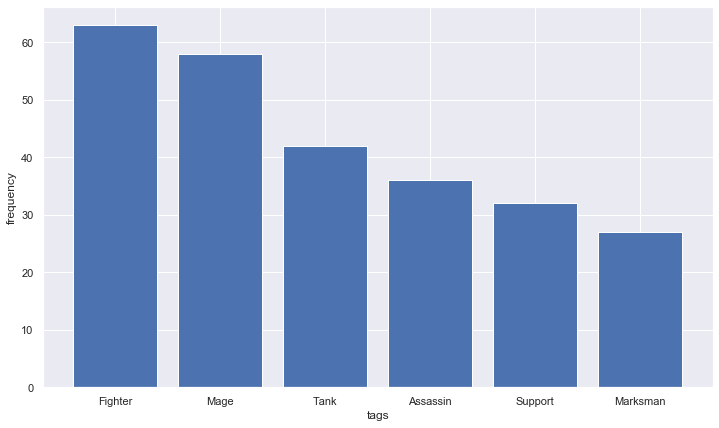

In [288]:
# plotting most common types of combinations of tags
sns.set()
plt.figure(figsize=(12,7))
plt.bar(to_plot[0].index.values, to_plot[0]['frequency'], align = 'center')
plt.xlabel('tags')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

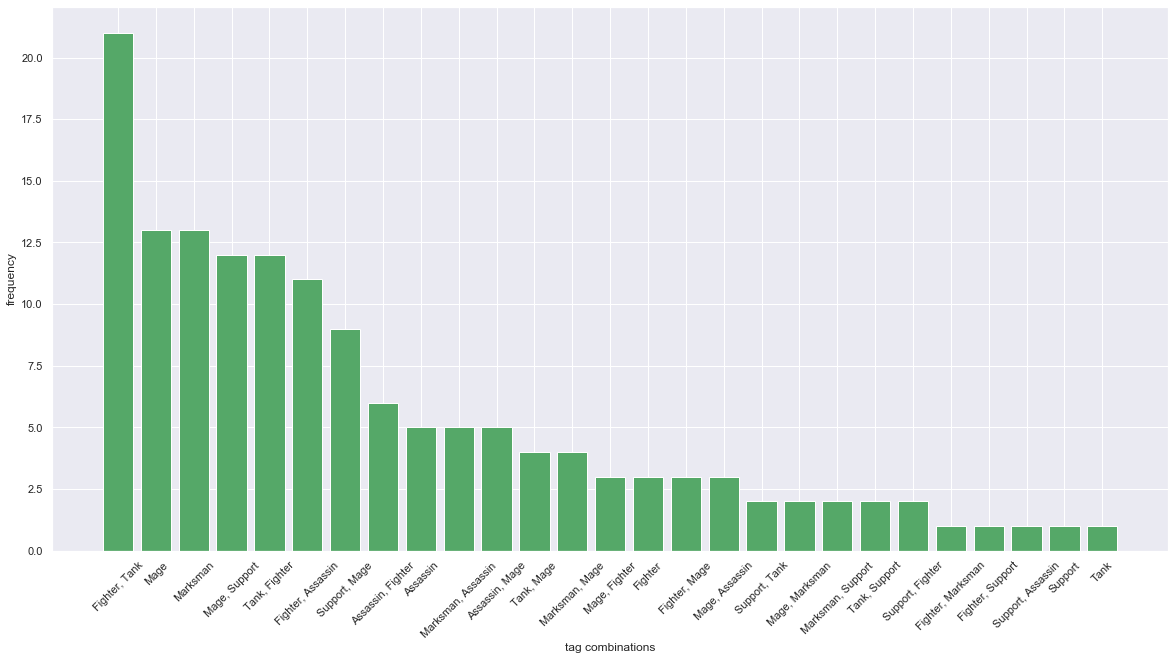

In [289]:
# plotting most common types individuals tags
plt.figure(figsize=(20, 10))
plt.bar(to_plot[1].index.values, to_plot[1]['frequency'], align = 'center', color = 'g')
plt.xticks(rotation = 45)
plt.xlabel('tag combinations')
plt.ylabel('frequency')

In [290]:
# splitting up stats to prepare to pca clustering analysis
champs_df_stats = champs_df.drop(['name', 'id', 'tags', 'image'], axis = 1)

In [291]:
champs_df_stats.head()

,key,attack,difficulty,magic,defense,armorPerLevel,mana,manaRegen,criticalStrikeChance,health,...,criticalStrikeChancePerLevel,magicResist,attackDamage,attackspeed,healthHegenPerLevel,magicResistPerLevel,manaRegenPerLevel,movespeed,attackDamagePerLevel,manaPerLevel
0,Aatrox,8,4,3,4,3.25,0.0,0.000,0.0,580.00,...,0.0,32.1,60.0000,0.651,1.00,1.25,0.000,345.0,5.00,0.0
1,Ahri,3,5,8,4,3.50,418.0,8.000,0.0,526.00,...,0.0,30.0,53.0400,0.668,0.60,0.50,0.800,330.0,3.00,25.0
2,Akali,5,7,8,3,3.50,200.0,50.000,0.0,575.00,...,0.0,37.0,62.4000,0.625,0.50,1.25,0.000,345.0,3.30,0.0
3,Alistar,6,7,5,9,3.50,350.0,8.500,0.0,573.36,...,0.0,32.1,61.1116,0.625,0.85,1.25,0.800,330.0,3.62,40.0
4,Amumu,2,3,8,6,3.80,287.2,7.382,0.0,613.12,...,0.0,32.1,53.3800,0.736,0.85,1.25,0.525,335.0,3.80,40.0
